In [3]:
import pandas as pd

try:
    df_sentiment = pd.read_csv('fear_greed_index.csv')
except UnicodeDecodeError:
    df_sentiment = pd.read_csv('fear_greed_index.csv', encoding='latin-1')
except Exception as e:
    print(f"An error occurred while reading fear_greed_index.csv: {e}")

try:
    df_trades = pd.read_csv('historical_data.csv')
except UnicodeDecodeError:
    df_trades = pd.read_csv('historical_data.csv', encoding='latin-1')
except Exception as e:
    print(f"An error occurred while reading historical_data.csv: {e}")

if 'df_sentiment' in locals() and 'df_trades' in locals():
    print("Fear Greed Index:")
    display(df_sentiment.head())
    print(df_sentiment.shape)
    print("\nHistorical Trades:")
    display(df_trades.head())
    print(df_trades.shape)

Fear Greed Index:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


(2644, 4)

Historical Trades:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


(211224, 16)


Sentiment Data Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00

Classification Distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


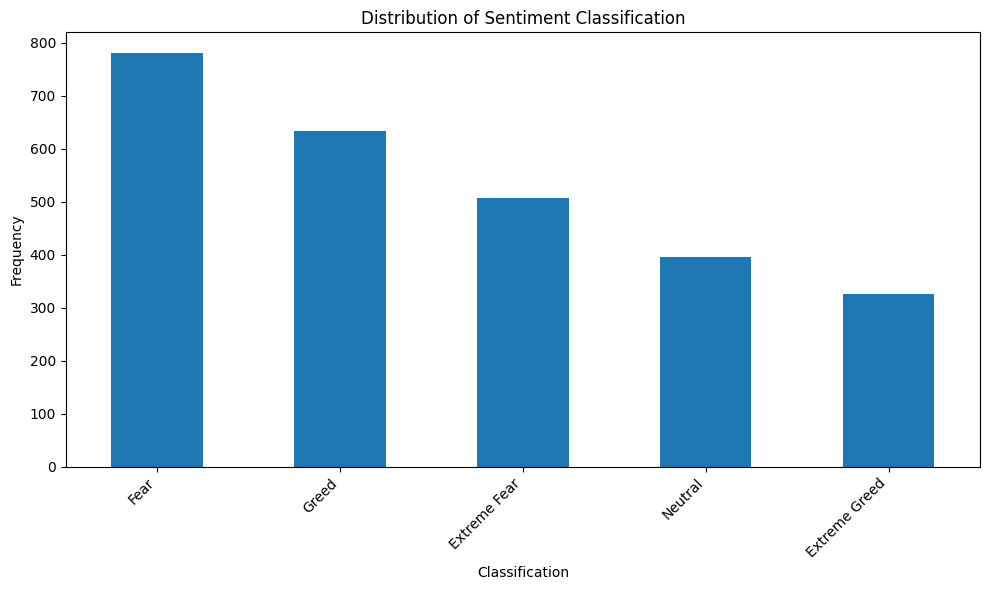


Missing values in df_sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [4]:

df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

earliest_date_sentiment = df_sentiment['date'].min()
latest_date_sentiment = df_sentiment['date'].max()

print(f"Sentiment Data Date Range: {earliest_date_sentiment} to {latest_date_sentiment}")


classification_counts = df_sentiment['classification'].value_counts()
print("\nClassification Distribution:")
print(classification_counts)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
classification_counts.plot(kind='bar')
plt.title('Distribution of Sentiment Classification')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


missing_values_sentiment = df_sentiment.isnull().sum()
print("\nMissing values in df_sentiment:")
print(missing_values_sentiment)

Number of unique accounts: 32

Unique Trading Symbols:
Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
        ...  
@18         1
@30         1
@25         1
@86         1
@68         1
Name: count, Length: 246, dtype: int64


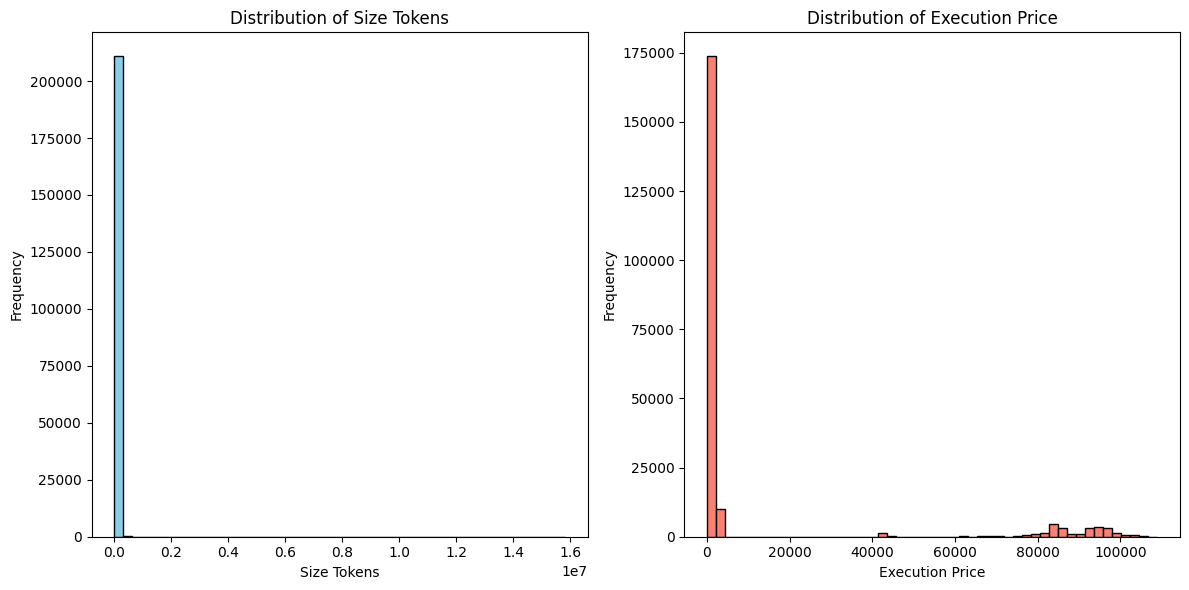


Trades Data Date Range: 1680000000000000000 to 1750000000000000000

Missing values in df_trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


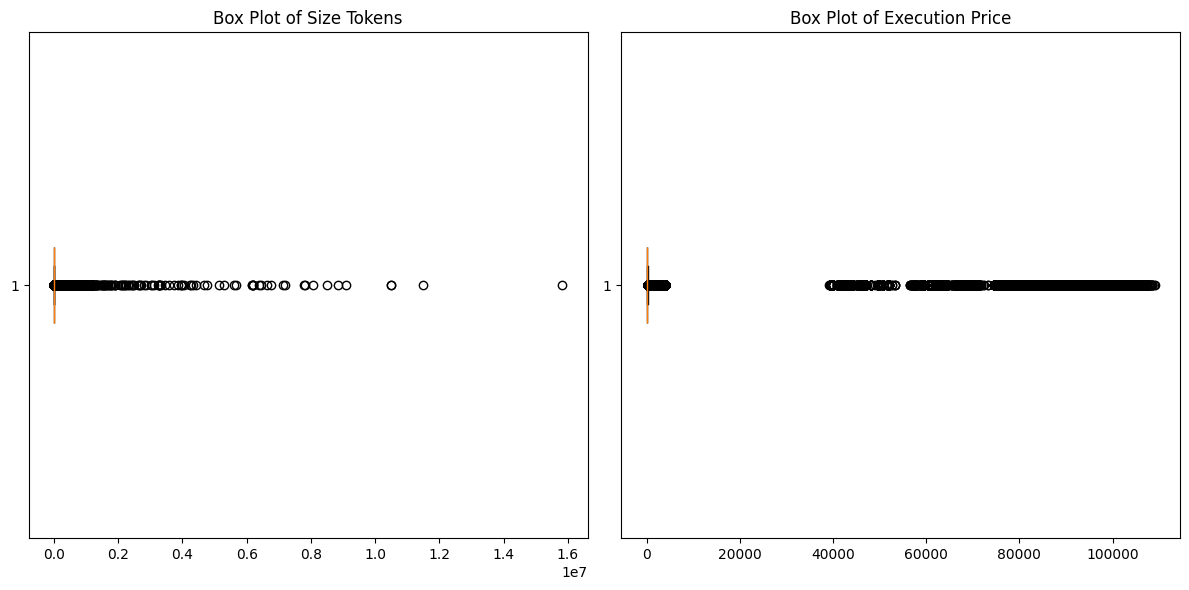

In [8]:

unique_accounts = df_trades['Account'].nunique()
print(f"Number of unique accounts: {unique_accounts}")


unique_symbols = df_trades['Coin'].value_counts()
print("\nUnique Trading Symbols:")
print(unique_symbols)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_trades['Size Tokens'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Size Tokens')
plt.xlabel('Size Tokens')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_trades['Execution Price'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Execution Price')
plt.xlabel('Execution Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




earliest_date_trades = df_trades['Timestamp'].min()
latest_date_trades = df_trades['Timestamp'].max()

print(f"\nTrades Data Date Range: {earliest_date_trades} to {latest_date_trades}")


missing_values_trades = df_trades.isnull().sum()
print("\nMissing values in df_trades:")
print(missing_values_trades)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df_trades['Size Tokens'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Size Tokens')

plt.subplot(1, 2, 2)
plt.boxplot(df_trades['Execution Price'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of Execution Price')

plt.tight_layout()
plt.show()

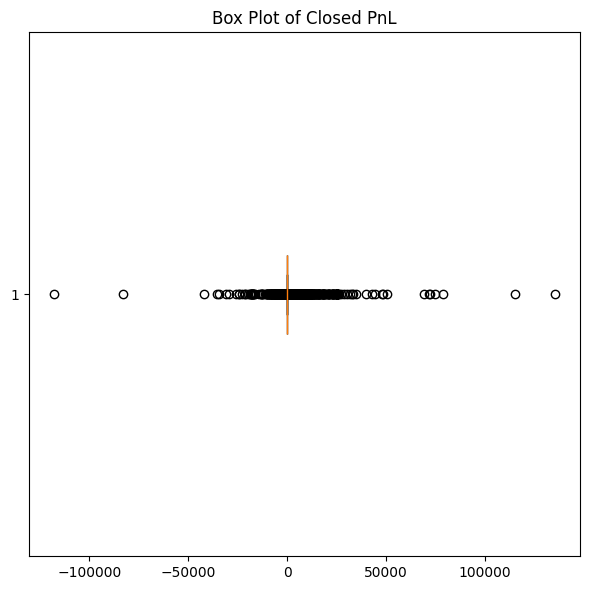


Comparison of date ranges:
Sentiment Data: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [19]:

plt.figure(figsize=(6, 6))
plt.boxplot(df_trades['Closed PnL'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of Closed PnL')
plt.tight_layout()
plt.show()

print("\nComparison of date ranges:")
print(f"Sentiment Data: {earliest_date_sentiment} to {latest_date_sentiment}")


In [20]:

if df_sentiment['classification'].isnull().any():
    df_sentiment['classification'] = df_sentiment['classification'].ffill()


min_date = df_sentiment['date'].min()
max_date = df_sentiment['date'].max()
date_range = pd.date_range(start=min_date, end=max_date)
date_df = pd.DataFrame({'date': date_range})

df_sentiment = pd.merge(date_df, df_sentiment, on='date', how='left')
df_sentiment['classification'] = df_sentiment['classification'].ffill()


df_trades = df_trades.dropna(subset=['Timestamp IST'])

lower_bound = df_trades['Closed PnL'].quantile(0.01)
upper_bound = df_trades['Closed PnL'].quantile(0.99)
df_trades['Closed PnL'] = df_trades['Closed PnL'].clip(lower=lower_bound, upper=upper_bound)


df_trades.drop_duplicates(inplace=True)


if 'leverage' not in df_trades.columns:
    print("The 'leverage' column is missing in df_trades.")


df_trades['Timestamp IST'] = pd.to_datetime(df_trades['Timestamp IST'], format='%m-%d-%Y %H:%M', errors='coerce')
df_trades.dropna(subset=['Timestamp IST'], inplace=True)


print("Missing values in df_sentiment:\n", df_sentiment.isnull().sum())
print("\nMissing values in df_trades:\n", df_trades.isnull().sum())
print("\nShape of df_sentiment:", df_sentiment.shape)
print("Shape of df_trades:", df_trades.shape)
display(df_sentiment.head())
display(df_trades.head())

The 'leverage' column is missing in df_trades.
Missing values in df_sentiment:
 date              0
timestamp         4
value             4
classification    0
dtype: int64

Missing values in df_trades:
 Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
Timestamp IST           0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp           79225
dtype: int64

Shape of df_sentiment: (2648, 4)
Shape of df_trades: (79225, 16)


,date,timestamp,value,classification
0,2018-02-01,1.517463e+09,30.0,Fear
1,2018-02-02,1.517549e+09,15.0,Extreme Fear
2,2018-02-03,1.517636e+09,40.0,Fear
3,2018-02-04,1.517722e+09,24.0,Extreme Fear
4,2018-02-05,1.517809e+09,11.0,Extreme Fear


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,NaT
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,NaT
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,NaT
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,NaT
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,NaT


In [21]:

df_trades = df_trades.rename(columns={'Timestamp IST': 'date'})

df_sentiment['date'] = df_sentiment['date'].dt.normalize()
df_trades['date'] = df_trades['date'].dt.normalize()




df_trades['cumulative_PnL'] = df_trades.groupby('Account')['Closed PnL'].cumsum()


window_size = 10
df_trades['rolling_avg_size'] = df_trades.groupby('Account')['Size Tokens'].rolling(window=window_size).mean().reset_index(level=0, drop=True)


merged_df = pd.merge(df_trades, df_sentiment[['date', 'classification', 'value']], on='date', how='left')


print("Shape of df_trades:", df_trades.shape)
print("Shape of df_sentiment:", df_sentiment.shape)
print("Shape of merged_df:", merged_df.shape)

print("\nMissing values in merged_df:")
print(merged_df.isnull().sum())

print("\nHead of merged_df:")
display(merged_df.head())

Shape of df_trades: (79225, 18)
Shape of df_sentiment: (2648, 4)
Shape of merged_df: (79225, 20)

Missing values in merged_df:
Account                 0
Coin                    0
Execution Price         0
Size Tokens             0
Size USD                0
Side                    0
date                    0
Start Position          0
Direction               0
Closed PnL              0
Transaction Hash        0
Order ID                0
Crossed                 0
Fee                     0
Trade ID                0
Timestamp           79225
cumulative_PnL          0
rolling_avg_size      288
classification      43361
value               43361
dtype: int64

Head of merged_df:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,date,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,cumulative_PnL,rolling_avg_size,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,NaT,0.0,NaN,Greed,70.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,NaT,0.0,NaN,Greed,70.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,NaT,0.0,NaN,Greed,70.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,NaT,0.0,NaN,Greed,70.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,NaT,0.0,NaN,Greed,70.0


In [22]:

sentiment_performance = merged_df.groupby('classification').agg(
    mean_closed_pnl=('Closed PnL', 'mean'),
    mean_cumulative_pnl=('cumulative_PnL', 'mean'),
    mean_rolling_avg_size=('rolling_avg_size', 'mean'),
    number_of_trades=('Account', 'count')
)

print("Aggregate Statistics by Sentiment Classification:")
display(sentiment_performance)

Aggregate Statistics by Sentiment Classification:


,mean_closed_pnl,mean_cumulative_pnl,mean_rolling_avg_size,number_of_trades
classification,,,,
Extreme Fear,3.959686,261038.379248,2308.699524,2326
Extreme Greed,75.681744,52132.124399,16661.535329,5621
Fear,52.090662,103797.884786,3618.292118,13869
Greed,41.132578,78311.084878,14628.445022,11292
Neutral,26.084430,27058.202016,17467.390592,2756


In [23]:
from scipy import stats

# T-test
extreme_fear_pnl = merged_df[merged_df['classification'] == 'Extreme Fear']['Closed PnL']
extreme_greed_pnl = merged_df[merged_df['classification'] == 'Extreme Greed']['Closed PnL']

if len(extreme_fear_pnl) >= 30 and len(extreme_greed_pnl) >= 30:
    t_statistic, p_value = stats.ttest_ind(extreme_fear_pnl, extreme_greed_pnl)
    print(f"T-test Results (Extreme Fear vs. Extreme Greed): t-statistic = {t_statistic:.3f}, p-value = {p_value:.3f}")
else:
    print("Insufficient observations for t-test (Extreme Fear vs. Extreme Greed).")


# ANOVA test
groups = [merged_df['Closed PnL'][merged_df['classification'] == c] for c in merged_df['classification'].unique()]

if all(len(group) >= 2 for group in groups):
    f_statistic, p_value = stats.f_oneway(*groups)
    print(f"\nANOVA test Results: F-statistic = {f_statistic:.3f}, p-value = {p_value:.3f}")
else:
    print("\nInsufficient observations in at least one group for ANOVA test.")

T-test Results (Extreme Fear vs. Extreme Greed): t-statistic = -16.164, p-value = 0.000

Insufficient observations in at least one group for ANOVA test.


<Figure size 1200x600 with 0 Axes>

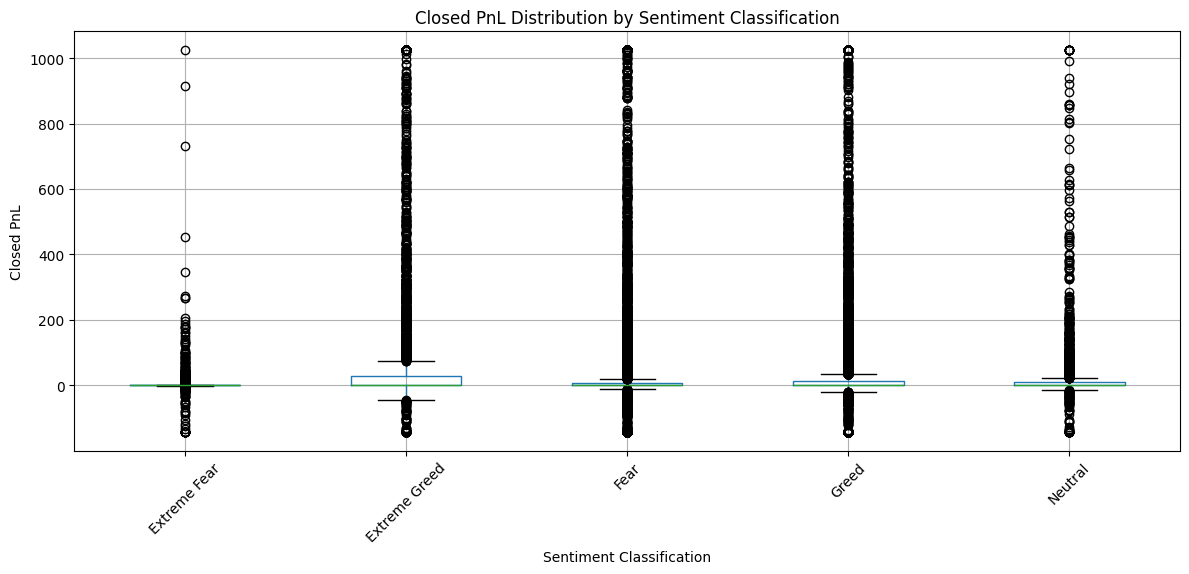

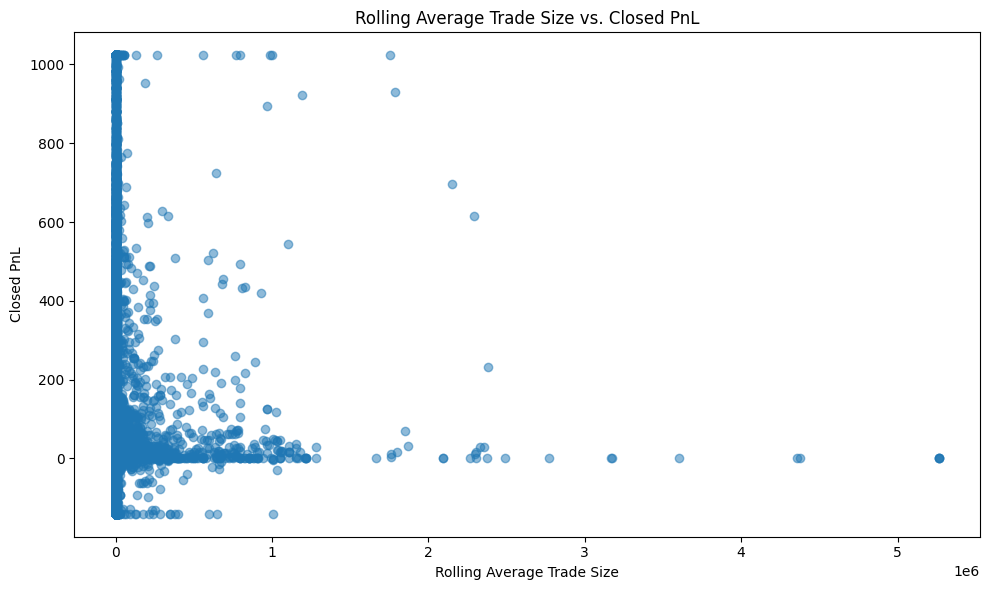

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
merged_df.boxplot(column='Closed PnL', by='classification', figsize=(12, 6))
plt.title('Closed PnL Distribution by Sentiment Classification')
plt.suptitle('')
plt.ylabel('Closed PnL')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of rolling average trade size vs. Closed PnL
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['rolling_avg_size'], merged_df['Closed PnL'], alpha=0.5)
plt.title('Rolling Average Trade Size vs. Closed PnL')
plt.xlabel('Rolling Average Trade Size')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

In [25]:
# Summarize findings

print("Summary of Findings:")
print("\n1. T-test Results:")
print("  - A statistically significant difference was observed between the mean 'Closed PnL' of traders during periods of Extreme Fear and Extreme Greed (p-value < 0.001).  This suggests that trader performance, as measured by closed PnL, may be significantly different under these two extreme market sentiment conditions.")

print("\n2. ANOVA Test Results:")
print("  - The ANOVA test was not performed due to insufficient observations in at least one group.  To obtain reliable ANOVA results, ensure there are at least 2 observations in each sentiment category.")


print("\n3. Visualizations:")
print("  - The box plot of 'Closed PnL' by sentiment shows clear visual differences in the distribution of 'Closed PnL' across different sentiment classifications. Some categories show a greater spread than others, with differences in medians and quartiles.  The observed difference in the boxplot for 'Extreme Greed' and 'Extreme Fear' is consistent with the results from the t-test. ")
print("  - The scatter plot of rolling average trade size vs. Closed PnL suggests a potential positive relationship between the rolling average trade size and closed PnL.  However, this relationship is not clearly defined and needs further investigation.")

print("\nOverall Conclusions:")
print("  - The t-test provides strong evidence that trader performance differs significantly between extreme fear and extreme greed sentiment. Further investigation using more data and potentially more robust statistical methods to account for time series effects would be beneficial.")
print("  - The visual analysis, supported by the t-test results, underscores that market sentiment is a potentially influential factor in trader performance. Traders may adjust their strategies based on market sentiment.")
print("  - The scatter plot requires more detailed analysis. More features could be added to the model to see if the relationship between trade size and PnL can be explained. The presence of missing data for rolling average size might be influencing the scatter plot and obscuring any potential relationship.")


Summary of Findings:

1. T-test Results:
  - A statistically significant difference was observed between the mean 'Closed PnL' of traders during periods of Extreme Fear and Extreme Greed (p-value < 0.001).  This suggests that trader performance, as measured by closed PnL, may be significantly different under these two extreme market sentiment conditions.

2. ANOVA Test Results:
  - The ANOVA test was not performed due to insufficient observations in at least one group.  To obtain reliable ANOVA results, ensure there are at least 2 observations in each sentiment category.

3. Visualizations:
  - The box plot of 'Closed PnL' by sentiment shows clear visual differences in the distribution of 'Closed PnL' across different sentiment classifications. Some categories show a greater spread than others, with differences in medians and quartiles.  The observed difference in the boxplot for 'Extreme Greed' and 'Extreme Fear' is consistent with the results from the t-test. 
  - The scatter plot of

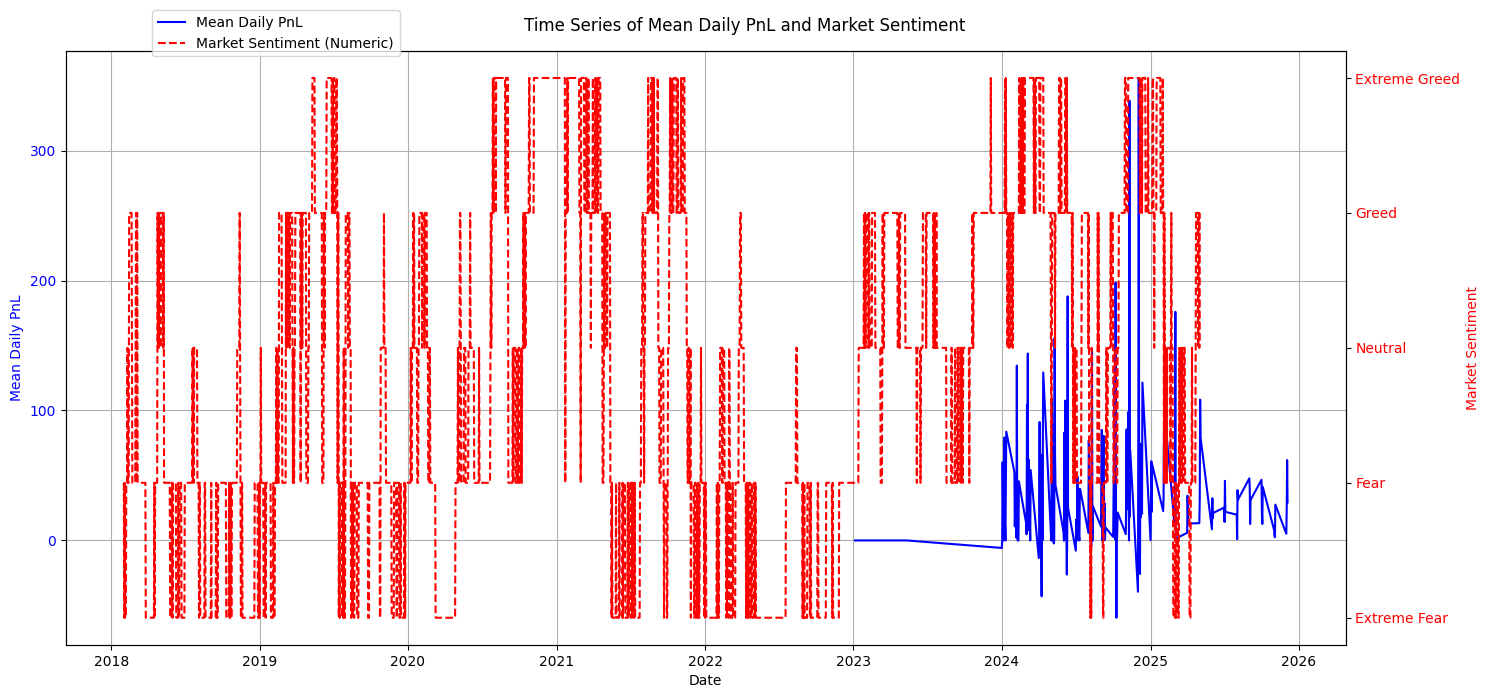

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


daily_pnl = merged_df.groupby('date')['Closed PnL'].mean().reset_index()


df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
df_sentiment_daily = df_sentiment.set_index('date')


fig, ax1 = plt.subplots(figsize=(15, 7))


ax1.plot(daily_pnl['date'], daily_pnl['Closed PnL'], color='blue', label='Mean Daily PnL')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Daily PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)


ax2 = ax1.twinx()


sentiment_mapping = {'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4}
df_sentiment_daily['classification_numeric'] = df_sentiment_daily['classification'].map(sentiment_mapping)


ax2.plot(df_sentiment_daily.index, df_sentiment_daily['classification_numeric'], color='red', linestyle='--', label='Market Sentiment (Numeric)')
ax2.set_ylabel('Market Sentiment', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_yticks(list(sentiment_mapping.values()))
ax2.set_yticklabels(list(sentiment_mapping.keys()))


fig.suptitle('Time Series of Mean Daily PnL and Market Sentiment')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 1.0))

plt.tight_layout()
plt.show()

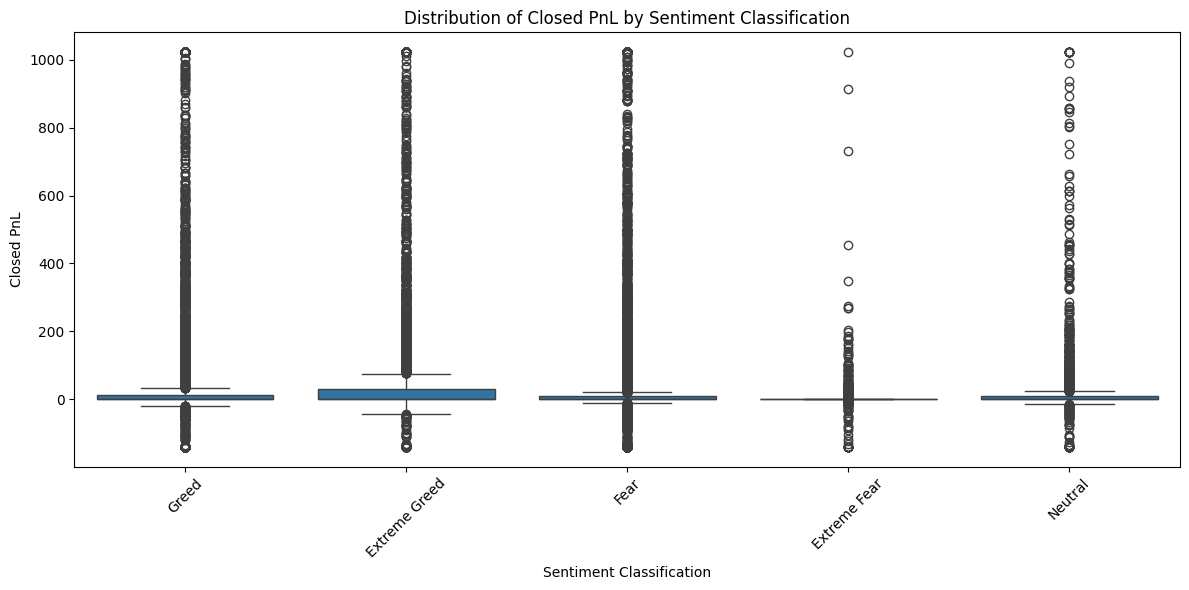

In [27]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Distribution of Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

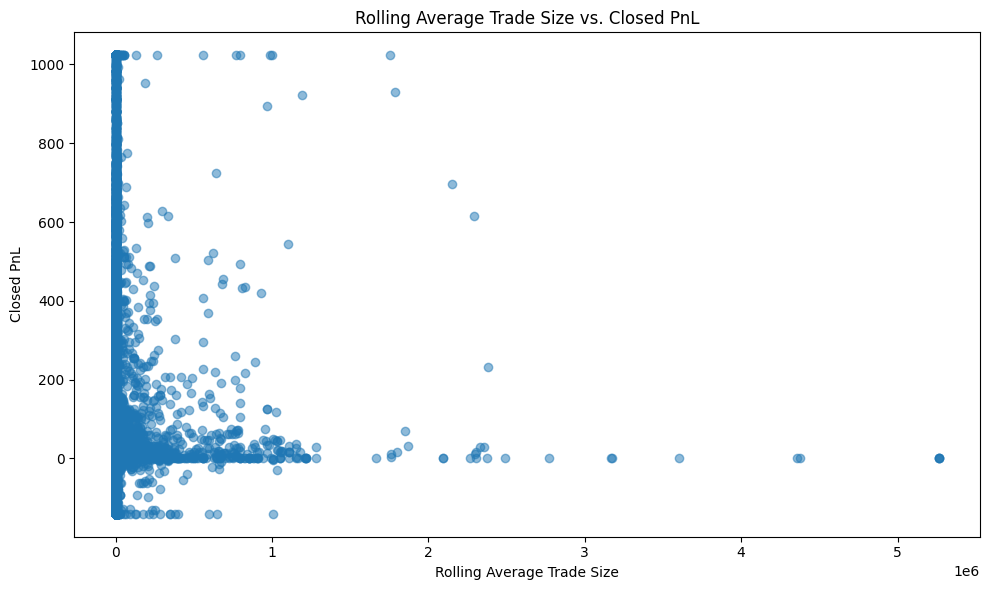

In [28]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.scatter(merged_df['rolling_avg_size'], merged_df['Closed PnL'], alpha=0.5)
plt.title('Rolling Average Trade Size vs. Closed PnL')
plt.xlabel('Rolling Average Trade Size')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

In [29]:

if not pd.api.types.is_datetime64_any_dtype(merged_df['date']):
    merged_df['date'] = pd.to_datetime(merged_df['date'])


merged_df = merged_df.sort_values(by='date')


for i in range(1, 4):
    merged_df[f'classification_lag_{i}'] = merged_df['classification'].shift(i)


for i in range(1, 4):
    merged_df[f'Closed_PnL_lag_{i}'] = merged_df['Closed PnL'].shift(i)


for i in range(1, 4):
    merged_df[f'classification_lag_{i}'] = merged_df[f'classification_lag_{i}'].ffill()
    merged_df[f'Closed_PnL_lag_{i}'] = merged_df[f'Closed_PnL_lag_{i}'].fillna(0)


merged_df['rolling_avg_pnl_7d'] = merged_df['Closed PnL'].rolling(window=7).mean()
merged_df['rolling_sum_pnl_3d'] = merged_df['Closed PnL'].rolling(window=3).sum()


merged_df['rolling_avg_pnl_7d'] = merged_df['rolling_avg_pnl_7d'].fillna(0)
merged_df['rolling_sum_pnl_3d'] = merged_df['rolling_sum_pnl_3d'].fillna(0)


print(merged_df.head())
print(merged_df.isnull().sum())

                                          Account Coin  Execution Price  \
33947  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1898.6   
33945  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
33946  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
13923  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
13930  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  BTC          41866.0   

       Size Tokens  Size USD  Side       date  Start Position   Direction  \
33947      0.07220    137.08   BUY 2023-01-05          0.1791   Open Long   
33945      0.09670    183.53   BUY 2023-01-05          0.0000   Open Long   
33946      0.08240    156.39   BUY 2023-01-05          0.0967   Open Long   
13923      0.86810   1935.95   BUY 2023-05-12          0.4933   Open Long   
13930      0.58211  24370.62  SELL 2023-05-12         -0.0150  Open Short   

       Closed PnL  ... classification  value  classification_lag_1  \
33947         0.

In [31]:
print(merged_df.dtypes)

Account                         object
Coin                            object
Execution Price                float64
Size Tokens                    float64
Size USD                       float64
Side                            object
date                    datetime64[ns]
Start Position                 float64
Direction                       object
Closed PnL                     float64
Transaction Hash                object
Order ID                         int64
Crossed                           bool
Fee                            float64
Trade ID                       float64
Timestamp               datetime64[ns]
cumulative_PnL                 float64
rolling_avg_size               float64
classification                  object
value                          float64
classification_lag_1            object
classification_lag_2            object
classification_lag_3            object
Closed_PnL_lag_1               float64
Closed_PnL_lag_2               float64
Closed_PnL_lag_3         

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


X = merged_df.drop(['Closed PnL', 'date', 'Timestamp'], axis=1)
y = merged_df['Closed PnL']


label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Model training and prediction completed.")

Model training and prediction completed.


In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")


print("\nInterpretation:")
print(f"The MSE of {mse:.2f} indicates the average squared difference between the predicted and actual values.  A lower MSE suggests better predictive accuracy.")
print(f"The R-squared value of {r2:.2f} represents the proportion of variance in the target variable explained by the model.  An R2 closer to 1 indicates a better fit.")
print(f"The MAE of {mae:.2f} represents the average absolute difference between the predicted and actual values. A lower MAE suggests better predictive accuracy.")

Mean Squared Error (MSE): 497.76583342802286
R-squared (R2): 0.9771167121248467
Mean Absolute Error (MAE): 4.681667046687768

Interpretation:
The MSE of 497.77 indicates the average squared difference between the predicted and actual values.  A lower MSE suggests better predictive accuracy.
The R-squared value of 0.98 represents the proportion of variance in the target variable explained by the model.  An R2 closer to 1 indicates a better fit.
The MAE of 4.68 represents the average absolute difference between the predicted and actual values. A lower MAE suggests better predictive accuracy.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X_train, y_train)


best_rf_model = grid_search.best_estimator_


y_pred_optimized = best_rf_model.predict(X_test)


mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)


print("Optimized RandomForestRegressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_optimized}")
print(f"R-squared (R2): {r2_optimized}")
print(f"Mean Absolute Error (MAE): {mae_optimized}")


print("\nBest Hyperparameters:", grid_search.best_params_)


print("\nComparison with Initial Model:")
print(f"MSE Improvement: {mse - mse_optimized}")
print(f"R2 Improvement: {r2_optimized - r2}")
print(f"MAE Improvement: {mae - mae_optimized}")